<a href="https://colab.research.google.com/github/karind7/syncare_app/blob/master/banks_loan_division.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Open the data file and have a look at the general information**

In [1]:
import pandas as pd
from nltk.stem import SnowballStemmer
import matplotlib as plt
english_stemmer = SnowballStemmer('english')

In [2]:
try:
  data = pd.read_csv("/content/credit_scoring_eng.csv")
except:
  data = pd.read_csv("/datasets/credit_scoring_eng.csv")

In [3]:
data.info()
#only null values in days_employed  and total_income 
#lets check for a connection as the number of missing valuse is the same

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


In [5]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


# **conclusion:**


1.   nagative days employed and as i dont use it for my data summary i will remove this column
2.   -1 children that i need to change
4. probbly no one  has 20 children, change to 50% 
3. none in total income	so i will change it to the median
4. change education to low case
5. alter purpose for easy categorization



# **Step 2: Preprocess the data**

In [6]:
#remove non usable data
data = data.drop('days_employed', 1)

In [7]:
#let's check total income median by income type
income_grop = data.groupby("income_type")["total_income"].median()

In [8]:
# a funcshen that changes non in total income to the income type median
def income(row):
  income = row["total_income"]
  if pd.isnull(income):
    return income_grop[row["income_type"]]
  else:
    return row["total_income"]

data["total_income"] = data.apply(income, axis=1)


In [9]:
data.loc[data["children"]< 0]["children"].count()
#there are 47 rows with -1 children


47

In [10]:
data.loc[data["children"] == 20]["children"].count()
#there are 76 rows with 20 children

76

In [11]:
data.loc[data["children"] != 20].loc[data["children"] > 0].describe()


,children,dob_years,education_id,family_status_id,debt,total_income
count,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000
mean,1.396250,37.523508,0.789604,0.684820,0.092238,27162.092299
std,0.615705,9.065211,0.562789,1.209649,0.289381,16674.100991
min,1.000000,0.000000,0.000000,0.000000,0.000000,3418.824000
25%,1.000000,31.000000,0.000000,0.000000,0.000000,17672.203000
50%,1.000000,37.000000,1.000000,0.000000,0.000000,23096.777000
75%,2.000000,42.000000,1.000000,1.000000,0.000000,31769.100000
max,5.000000,73.000000,4.000000,4.000000,1.000000,352136.354000


In [12]:
data.loc[data["children"] < 0,"children"] = 1
data.loc[data["children"] == 20, "children"] = 2
#changing the -1 children to 1 and the 20 children to 2

In [13]:
#lets see if it workd
data.loc[data["children"] == 20].loc[data["children"] < 0]

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose


In [14]:
data["purpose"].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [15]:
# unifying the education column to lowercase
data["education"] = data["education"].str.lower()
data["education"].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [16]:
#a function that takes a list and returns a list with only the unique values
def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [17]:
#looking at the unique stem words to find how to categorize 
list1 = []
for query in data["purpose"].unique():
    for word in query.split(" "):
        stemmed_word = english_stemmer.stem(word)
        if stemmed_word != 'a' and stemmed_word != 'of' and stemmed_word != 'the' and stemmed_word != 'to' and stemmed_word != 'for'  and stemmed_word != 'an':
          list1.append(stemmed_word)
unique(list1)

['purchas',
 'hous',
 'car',
 'supplementari',
 'educ',
 'have',
 'wed',
 'transact',
 'my',
 'famili',
 'buy',
 'real',
 'estat',
 'commerci',
 'residenti',
 'construct',
 'own',
 'properti',
 'build',
 'second-hand',
 'with',
 'becom',
 'get',
 'ceremoni',
 'higher',
 'profil',
 'univers',
 'rent',
 'out',
 'renov',
 'go']

In [18]:
#create a new column of the description of the purpose of the porches for an easy categorization
def purpose_stem(row):
  purpose =  row["purpose"]
  for word in purpose.split(" "):
      stemmed_word = english_stemmer.stem(word)
      if stemmed_word == 'estat' or stemmed_word == 'hous' or stemmed_word == 'properti':
          return "real estate"
      elif stemmed_word == 'educ' or stemmed_word == "univers":
        return "education"
      elif stemmed_word == 'wed':
        return "wedding"
      elif stemmed_word == 'car':
        return "car"

data["purpose_stem"] = data.apply(purpose_stem, axis=1)



In [19]:
data["purpose_stem"].unique()


array(['real estate', 'car', 'education', 'wedding'], dtype=object)

In [20]:
data.describe()

,children,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000,21525.000000
mean,0.479721,43.293380,0.817236,0.972544,0.080883,26436.051922
std,0.755528,12.574584,0.548138,1.420324,0.272661,15686.986477
min,0.000000,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,33.000000,1.000000,0.000000,0.000000,17247.708000
50%,0.000000,42.000000,1.000000,0.000000,0.000000,22815.103500
75%,1.000000,53.000000,1.000000,1.000000,0.000000,31287.991000
max,5.000000,75.000000,4.000000,4.000000,1.000000,362496.645000


In [21]:
#create a new column  for income of the porches for an easy categorization
#categorization income by the ta.describe() using the min, 25%, , 50% , 75% 
def income(row):
  income = row["total_income"]
  if income <= 14179:
      return "low earner"
  elif 14179 < income <= 21683 :
    return "under average earner"
  elif  21683 < income <= 31287 :
    return "above average earner"
  elif income > 31287:
     return "high erner"

data["total_income_categorie"] = data.apply(income, axis=1)


In [22]:
data["total_income_categorie"].unique()


array(['high erner', 'under average earner', 'above average earner',
       'low earner'], dtype=object)

In [23]:
#preparind child data for conclusion, loking at date repaimant gropt by number of children
chiled_status = data.groupby("children")["debt"].value_counts()
chiled_status

children  debt
0         0       13086
          1        1063
1         0        4420
          1         445
2         0        1929
          1         202
3         0         303
          1          27
4         0          37
          1           4
5         0           9
Name: debt, dtype: int64

# **conclusion:**


1.   remove column days employed
2.   -1 child change to 1 child
4. 20 children change to 2 children 
3. none in total income	changed it to the median bt income type
4. change education to low case
5. alter purpose for easy categorization







# **Step 3: Answer these questions**


In [24]:
# Is there a connection between marital status and repaying a loan on time?
family_status = pd.pivot_table(data, index = ["family_status"], columns = "debt", values = "family_status_id", aggfunc = "count", margins = True).reset_index()
family_status["default_rate"] = (family_status[1]/family_status["All"])*100
family_status

debt,family_status,0,1,All,default_rate
0,civil partnership,3789,388,4177,9.288963
1,divorced,1110,85,1195,7.112971
2,married,11449,931,12380,7.520194
3,unmarried,2539,274,2813,9.740491
4,widow / widower,897,63,960,6.562500
5,All,19784,1741,21525,8.088269


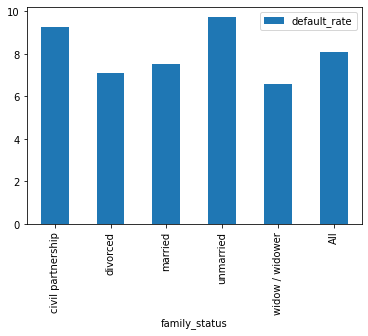

In [25]:
family_status.plot(x = "family_status", y = "default_rate", kind = "bar")

1. Is there a connection between marital status and repaying a loan on time?
  *   yes, in the graph we can see that widow / widower default rate is the 

In [26]:
# added this one myself, Is there a connection between education status and repaying a loan on time?
education_status = pd.pivot_table(data, index = ["education"], columns = "debt", values = "education_id", aggfunc = "count", margins = True).reset_index()
education_status[1] = education_status[1] .fillna(0)
education_status["default_rate"] = (education_status[1]/education_status["All"])*100
education_status

debt,education,0,1,All,default_rate
0,bachelor's degree,4982.0,278.0,5260,5.285171
1,graduate degree,6.0,0.0,6,0.000000
2,primary education,251.0,31.0,282,10.992908
3,secondary education,13869.0,1364.0,15233,8.954244
4,some college,676.0,68.0,744,9.139785
5,All,19784.0,1741.0,21525,8.088269


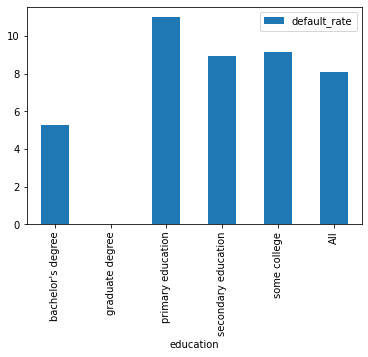

In [27]:
education_status.plot(x = "education", y = "default_rate", kind = "bar")

2. added this one myself, Is there a connection between education status and repaying a loan on time?
  *   yes, in the graph we can see that people with bachelor's degree default rate is the lowest and primary education is the highest
  * and i feel like we don't have enough information on graduate degree	because the sample size is too small

In [28]:
#How do different loan purposes affect on-time loan repayment?
purpose_status = pd.pivot_table(data, index = ["purpose_stem"], columns = "debt", values = "purpose", aggfunc = "count", margins = True).reset_index()
purpose_status["default_rate"] = (purpose_status[1]/purpose_status["All"])*100
purpose_status

debt,purpose_stem,0,1,All,default_rate
0,car,3912,403,4315,9.339513
1,education,3652,370,4022,9.199403
2,real estate,10058,782,10840,7.214022
3,wedding,2162,186,2348,7.921635
4,All,19784,1741,21525,8.088269


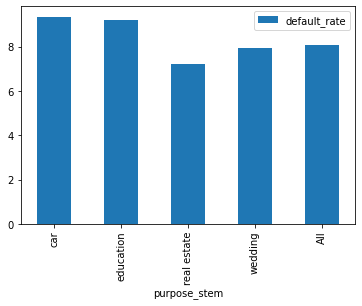

In [29]:
purpose_status.plot(x = "purpose_stem", y = "default_rate", kind = "bar")

3. How do different loan purposes affect on-time loan repayment?
  *   yes, in the graph we can see that real estate default rate is the lowest and car is the highest

In [30]:
#Is there a connection between income level and repaying a loan on time?
income_status= pd.pivot_table(data, index = ["total_income_categorie"], columns = "debt", values= "total_income", aggfunc = "count", margins = True).reset_index()
income_status["default_rate"] = (income_status[1]/income_status["All"])*100
income_status

debt,total_income_categorie,0,1,All,default_rate
0,above average earner,6520,621,7141,8.696261
1,high erner,4996,386,5382,7.172055
2,low earner,2962,247,3209,7.697102
3,under average earner,5306,487,5793,8.406698
4,All,19784,1741,21525,8.088269


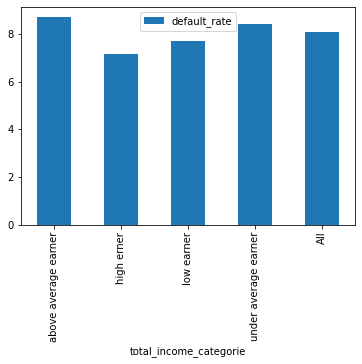

In [31]:
income_status.plot(x = "total_income_categorie", y = "default_rate", kind = "bar")

. Is there a connection between income level and repaying a loan on time?
  *   yes but the conacshen is not that strong, in the graph we can see that high erner default rate is the lowest and above average earner is the highest(should look at it as it contradicts intuition)

In [32]:
#Is there a connection between having kids and repaying a loan on time?
#i created a new tabel withe the number of children and the default_rate usind chiled_status vairbal i created before
num_of_children = [0, 1, 2, 3 ,4 ,5]
children_default_rate = []
all = 0
for i in range(len(num_of_children)):
  if i != 5:
     children_default_rate.append([i, (chiled_status[i][1]/chiled_status[i][0])*100])
     all += (chiled_status[i][1]/chiled_status[i][0])*100
  else:
    children_default_rate.append([5, 0])
children_default_rate.append(["ALL", all/5])
children_status = pd.DataFrame(children_default_rate, columns = ['children', "default_rate"])
children_status
#i dont feel like this is the most elagent way to solve this problem, any suggestion for better algorithm?

,children,default_rate
0,0,8.123185
1,1,10.067873
2,2,10.471747
3,3,8.910891
4,4,10.810811
5,5,0.000000
6,ALL,9.676901


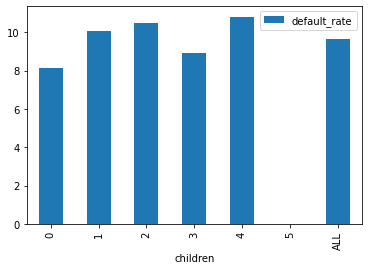

In [33]:
children_status.plot(x = "children" , y = "default_rate", kind = "bar")

5. Is there a connection between having kids and repaying a loan on time?
  *   yes, in the graph we can see that no children an 1 child default rate is the lowest and 4 children is the highest(should look at it as it contradicts intuition)
  * and i feel like we don't have enough information on 5 children because the sample size is too small

# **Step 4: Write an overall conclusion**

1.   remove column days employed
2.   -1 child change to 1 child
4. 20 children change to 2 children 
3. none in total income	changed it to the median bt income type
4. change education to low case
5. alter purpose for easy categorization
6. created pivot tables for every question I researched and a graph




